In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

import math

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
address = '/Users/phillip/Downloads/Python/Datasets/craigslistVehicles.csv'
data = pd.read_csv(address)

In [8]:
data.drop_duplicates(inplace= True)

In [4]:
data.isnull().any()

url             False
city            False
city_url        False
price           False
year             True
manufacturer     True
make             True
condition        True
cylinders        True
fuel             True
odometer         True
title_status     True
transmission     True
VIN              True
drive            True
size             True
type             True
paint_color      True
image_url        True
desc             True
lat              True
long             True
dtype: bool

In [5]:
data.isnull().sum()/ data.shape[0]

url             0.000000
city            0.000000
city_url        0.000000
price           0.000000
year            0.002738
manufacturer    0.046742
make            0.016427
condition       0.467744
cylinders       0.400122
fuel            0.008168
odometer        0.187493
title_status    0.005372
transmission    0.008115
VIN             0.418733
drive           0.287852
size            0.668113
type            0.283229
paint_color     0.326208
image_url       0.000015
desc            0.000046
lat             0.023241
long            0.023241
dtype: float64

In [10]:
data.desc.head()
data.desc.head().apply(lambda x: x.lower())
data.desc.head().apply(lambda x: x.upper())
data['text_len'] = data.desc.apply(lambda x: len(str(x)))
(data['text_len'].value_counts() > 1).sum()

12404

In [11]:
data.cylinders.dtype
data.cylinders.value_counts()
data.cylinders = data.cylinders.apply(lambda x: str(x).replace('cylinders','').strip())
data.cylinders.value_counts()

nan      210400
6        112931
8         97876
4         97669
5          2810
10         1804
other      1523
3           595
12          231
Name: cylinders, dtype: int64

In [12]:
data.cylinders = pd.to_numeric(data.cylinders, errors = 'coerce')
data.cylinders.value_counts()

6.0     112931
8.0      97876
4.0      97669
5.0       2810
10.0      1804
3.0        595
12.0       231
Name: cylinders, dtype: int64

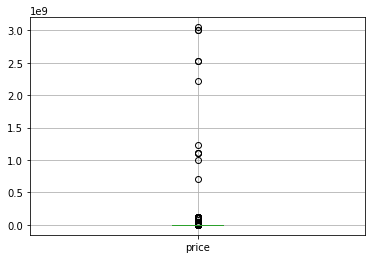

In [9]:
data.boxplot('price')

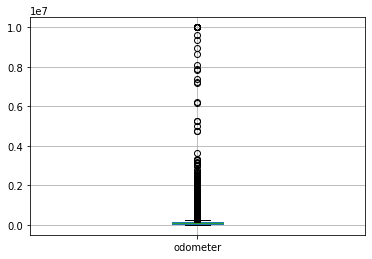

In [10]:
data.boxplot('odometer')

In [11]:
# Outlier detection & normalization - removing rows with < 99% z score

In [13]:
data_outliers = data[(data.price < data.price.quantile(.995)) & (data.price > data.price.quantile(.005)) & (data.price != 0) & (data.odometer != 0)]


In [14]:
data_outliers = data_outliers[(data_outliers.odometer < data_outliers.odometer.quantile(.995)) & (data_outliers.odometer > data_outliers.odometer.quantile(.005))]


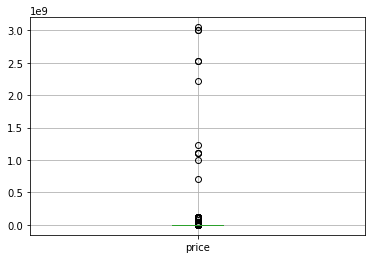

In [24]:
data.boxplot('price')

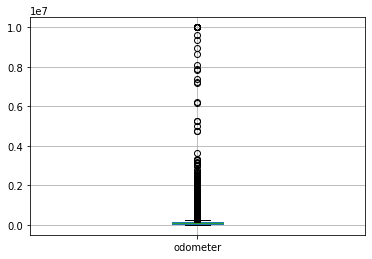

In [20]:
data.boxplot('odometer')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119e88150>,
      dtype=object)

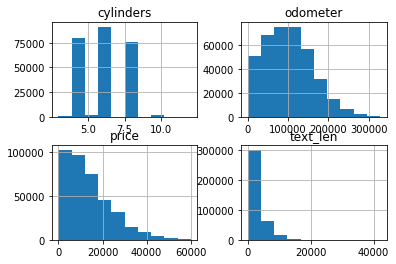

In [25]:
data_outliers[['price', 'odometer', 'cylinders', 'text_len']].hist()

In [30]:
data_outliers.isnull()
data_outliers.isnull().sum()/ data_outliers.shape[0]

url             0.000000
city            0.000000
city_url        0.000000
price           0.000000
year            0.003109
manufacturer    0.033132
make            0.010946
condition       0.416115
cylinders       0.343725
fuel            0.008725
odometer        0.000000
title_status    0.006728
transmission    0.009256
VIN             0.327061
drive           0.205641
size            0.633330
type            0.195401
paint_color     0.244585
image_url       0.000000
desc            0.000008
lat             0.016970
long            0.016970
text_len        0.000000
dtype: float64

In [31]:
#Imputing nulls

In [15]:
data_outliers.dropna(subset=['year','manufacturer','make','fuel','title_status','transmission'], inplace=True)

In [34]:
data_outliers.isnull().sum()/data_outliers.shape[0]

url             0.000000
city            0.000000
city_url        0.000000
price           0.000000
year            0.000000
manufacturer    0.000000
make            0.000000
condition       0.404298
cylinders       0.339355
fuel            0.000000
odometer        0.000000
title_status    0.000000
transmission    0.000000
VIN             0.329703
drive           0.203634
size            0.628311
type            0.194743
paint_color     0.244353
image_url       0.000000
desc            0.000008
lat             0.017388
long            0.017388
text_len        0.000000
dtype: float64

In [35]:
# Imputing 'cylinders' null values with median 

In [16]:
data_outliers.cylinders.fillna(data_outliers.cylinders.median(), inplace=True)

In [38]:
data_outliers.isnull().sum()/data_outliers.shape[0]

url             0.000000
city            0.000000
city_url        0.000000
price           0.000000
year            0.000000
manufacturer    0.000000
make            0.000000
condition       0.404298
cylinders       0.000000
fuel            0.000000
odometer        0.000000
title_status    0.000000
transmission    0.000000
VIN             0.329703
drive           0.203634
size            0.628311
type            0.194743
paint_color     0.244353
image_url       0.000000
desc            0.000008
lat             0.017388
long            0.017388
text_len        0.000000
dtype: float64

In [39]:
# Fillna --> Categorical varibles
# Filling null values with 'n/a'

In [17]:
data_outliers[['condition','VIN','drive','size','type','paint_color']] = data_outliers[['condition','VIN','drive','size','type','paint_color']].fillna('n/a')

In [41]:
data_outliers.isnull().sum()/data_outliers.shape[0]

url             0.000000
city            0.000000
city_url        0.000000
price           0.000000
year            0.000000
manufacturer    0.000000
make            0.000000
condition       0.000000
cylinders       0.000000
fuel            0.000000
odometer        0.000000
title_status    0.000000
transmission    0.000000
VIN             0.000000
drive           0.000000
size            0.000000
type            0.000000
paint_color     0.000000
image_url       0.000000
desc            0.000008
lat             0.017388
long            0.017388
text_len        0.000000
dtype: float64

In [42]:
# Imputing VIN number --> 'has_vin' & 'no_vin'

In [18]:
data_outliers.VIN.head(20)
data_outliers.VIN = data_outliers.VIN.apply(lambda x: 'has_vin' if x!= 'n/a' else 'no_vin')

In [19]:
data_final = data_outliers.drop(['url','city','city_url','image_url','lat','long','desc','size',], axis= 1)

In [20]:
data_final['constant'] = 1

In [22]:
data_final['age'] = 2019 - data_final.year

In [23]:
numeric = data_final._get_numeric_data()
corrdata = numeric

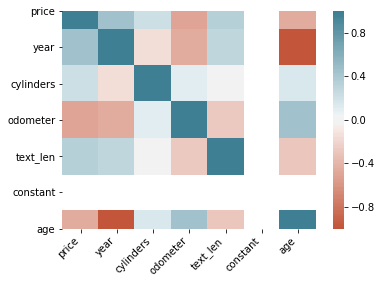

In [24]:
corr = corrdata.corr()
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [1]:
#### Regression ####

In [26]:
x1 = data_final.odometer.values.reshape(-1,1)
y1 = data_final.price.values.reshape(-1,1)

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size=0.3, random_state=0)

In [27]:
reg = LinearRegression().fit(x_train1, y_train1)
reg.score(x_train1, y_train1) # R square
reg.coef_
y_hat1 = reg.predict(x_train1)

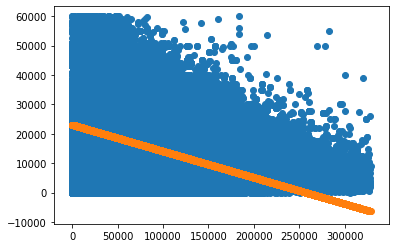

In [29]:
plt.scatter(x_train1, y_train1)
plt.scatter(x_train1, y_hat1)
plt.show()

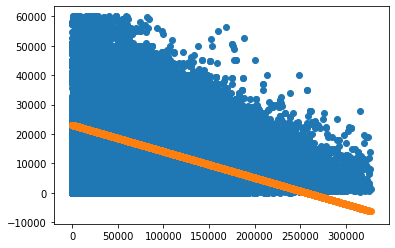

In [32]:
y_hat_test1 = reg.predict(x_test1)
plt.scatter(x_test1, y_test1)
plt.scatter(x_test1, y_hat_test1)
plt.show()

In [33]:
#MSE & RMSE penalize large errors more than MAE

In [34]:
mae = mean_absolute_error(y_hat_test1, y_test1)
rmse = math.sqrt(mean_squared_error(y_hat_test1, y_test1))
print('Root Mean Squared Error = ', rmse)
print('Mean Absolute Error = ', mae)

Root Mean Squared Error =  8961.501813364584
Mean Absolute Error =  6789.562740718528


In [43]:
### Using Statsmodels api

In [45]:
x1b = data_final[['constant','odometer']]
y1b = data_final.price.values

x_train1b, x_test1b, y_train1b, y_test1b = train_test_split(x1b,y1b, test_size=0.3, random_state=0)

In [46]:
reg_sm1b = sm.OLS(y_train1b, x_train1b).fit()
reg_sm1b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                 8.601e+04
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:29:37   Log-Likelihood:            -2.6343e+06
No. Observations:              250366   AIC:                         5.269e+06
Df Residuals:                  250364   BIC:                         5.269e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    2.309e+04     35.810    644.790      0.000     2.3e+04    2.32e+04
odometer      -0.0897      0.000   -293.276      0.000      -0.090      -0.089
==============================================================================
Omnibus:                    39044.510   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71378.591
Skew:                           0.998   Prob(JB):                         0.00
Kurtosis:                       4.691   Cond. No.                     2.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
x2 = data_final[['constant','odometer','age','cylinders','text_len']]
y2 = data_final.price.values

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size=0.3, random_state=0)

reg_sm2 = sm.OLS(y_train2, x_train2).fit()
reg_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                 4.958e+04
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:11:32   Log-Likelihood:            -2.5982e+06
No. Observations:              250366   AIC:                         5.197e+06
Df Residuals:                  250361   BIC:                         5.197e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    8278.9028     77.585    106.707      0.000    8126.837    8430.968
odometer      -0.0646      0.000   -214.140      0.000      -0.065      -0.064
age         -445.6432      2.613   -170.530      0.000    -450.765    -440.521
cylinders   2447.2141     12.030    203.427      0.000    2423.636    2470.792
text_len       0.5777      0.006     96.954      0.000       0.566       0.589
==============================================================================
Omnibus:                    57455.137   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           210878.611
Skew:                           1.123   Prob(JB):                         0.00
Kurtosis:                       6.895   Cond. No.                     5.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# VIF Statistic
pd.Series([variance_inflation_factor(x2.values,i) for i in range(x2.shape[1])],index=x2.columns)

constant     24.936033
odometer      1.303456
age           1.345178
cylinders     1.031978
text_len      1.129116
dtype: float64

In [52]:
# Final Regression

In [53]:
x3 = pd.get_dummies(data_final[['constant','odometer','age','cylinders','text_len','condition','fuel','VIN','type']])
y3 = data_final.price.values

X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3, random_state=0)

reg_sm3 = sm.OLS(y_train3, X_train3).fit()
reg_sm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                 1.292e+04
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:18:33   Log-Likelihood:            -2.5594e+06
No. Observations:              250366   AIC:                         5.119e+06
Df Residuals:                  250337   BIC:                         5.119e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
constant             8824.2090     72.768    121.264      0.000    8681.585    8966.833
odometer               -0.0714      0.000   -266.024      0.000      -0.072      -0.071
age                  -372.0251      2.341   -158.918      0.000    -376.613    -367.437
cylinders            1306.6409     11.743    111.273      0.000    1283.626    1329.656
text_len                0.4171      0.006     75.667      0.000       0.406       0.428
condition_excellent  1119.4122     70.468     15.885      0.000     981.297    1257.528
condition_fair         57.0182    109.480      0.521      0.603    -157.560     271.596
condition_good        646.8381     71.788      9.010      0.000     506.135     787.541
condition_like new   2448.4190     82.404     29.712      0.000    2286.910    2609.928
condition_n/a        2245.0584     70.996     31.622      0.000    2105.908    2384.209
condition_new        4196.6026    289.199     14.511      0.000    3629.780    4763.426
condition_salvage   -1889.1394    318.021     -5.940      0.000   -2512.453   -1265.826
fuel_diesel          9877.2706     88.721    111.329      0.000    9703.380    1.01e+04
fuel_electric       -2186.3143    319.263     -6.848      0.000   -2812.061   -1560.568
fuel_gas             -668.5910     78.127     -8.558      0.000    -821.718    -515.464
fuel_hybrid           694.3354    136.708      5.079      0.000     426.392     962.279
fuel_other           1107.5084    100.698     10.998      0.000     910.143    1304.874
VIN_has_vin          5023.5403     39.302    127.818      0.000    4946.509    5100.572
VIN_no_vin           3800.6687     39.722     95.682      0.000    3722.815    3878.522
type_SUV              786.1862     49.941     15.742      0.000     688.303     884.069
type_bus             -562.4611    378.642     -1.485      0.137   -1304.589     179.667
type_convertible      905.1501    105.444      8.584      0.000     698.483    1111.817
type_coupe            530.2847     74.297      7.137      0.000     384.664     675.905
type_hatchback      -3248.4899     85.535    -37.978      0.000   -3416.137   -3080.843
type_mini-van       -1425.2864    102.588    -13.893      0.000   -1626.357   -1224.216
type_n/a              336.8739     51.006      6.605      0.000     236.903     436.845
type_offroad         6832.8024    340.243     20.082      0.000    6165.935    7499.670
type_other            397.1582     88.837      4.471      0.000     223.040     571.277
type_pickup          4879.9375     57.358     85.079      0.000    4767.518    4992.357
type_sedan          -2955.1734     50.209    -58.858      0.000   -3053.581   -2856.766
type_truck           4123.9395     59.347     69.489      0.000    4007.621    4240.258
type_van             -476.3991     93.362     -5.103      0.000    -659.386    -293.412
typ

In [58]:
y_hat3 = reg_sm3.predict(X_test3)


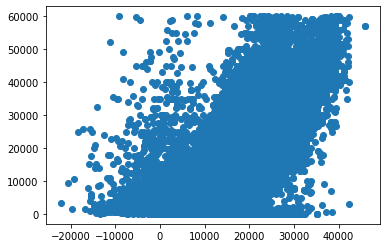

In [60]:
rsme3 = math.sqrt(mean_squared_error(y_hat3,y_test3))
plt.scatter(y_hat3,y_test3)

In [61]:
### Cross Validation 5 Fold ###

In [67]:
x4 = pd.get_dummies(data_final[['constant','odometer','age','cylinders','text_len','condition','fuel','VIN','type']])
y4 = data_final.price.values

x_train4, x_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.3, random_state=0)

reg4 = LinearRegression().fit(x_train4, y_train4)
reg4.score(x_train4, y_train4)


In [69]:
scores = cross_val_score(reg4,x4,y4, cv=5, scoring='neg_mean_squared_error')
np.sqrt(np.abs(scores))

array([6627.6098955 , 6620.09935142, 6709.51242701, 6839.1479071 ,
       6530.81090292])